# Stock Analysis

In [88]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [89]:
#Load dataset
dataset_train=pd.read_csv("stock_daily_tesla_train.csv")
dataset_train.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/06/2023,$113.06,220911100,$103.00,$114.39,$101.81
1,01/05/2023,$110.34,157986300,$110.51,$111.75,$107.1601
2,01/04/2023,$113.64,180389000,$109.11,$114.59,$107.52
3,01/03/2023,$108.10,231402800,$118.47,$118.80,$104.64
4,12/30/2022,$123.18,157777300,$119.95,$124.48,$119.75


In [90]:
dataset_train.tail()

,Date,Close/Last,Volume,Open,High,Low
2213,03/25/2014,$14.696,117785731,$14.9427,$15.1367,$14.5267
2214,03/24/2014,$14.678,169911365,$15.3167,$15.3267,$14.018
2215,03/21/2014,$15.2593,123213043,$15.7347,$15.7467,$15.1667
2216,03/20/2014,$15.6607,57165436,$15.744,$15.95,$15.5573
2217,03/19/2014,$15.7227,75951472,$16.0927,$16.1033,$15.5673


In [91]:
dataset_train.columns


Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [92]:
dataset_train = dataset_train.reindex(['Date', 'Open', 'High', 'Low','Close/Last', 'Volume' ],axis=1)

In [93]:
dataset_train.head()

,Date,Open,High,Low,Close/Last,Volume
0,01/06/2023,$103.00,$114.39,$101.81,$113.06,220911100
1,01/05/2023,$110.51,$111.75,$107.1601,$110.34,157986300
2,01/04/2023,$109.11,$114.59,$107.52,$113.64,180389000
3,01/03/2023,$118.47,$118.80,$104.64,$108.10,231402800
4,12/30/2022,$119.95,$124.48,$119.75,$123.18,157777300


In [94]:
dataset_train['Open'] = dataset_train['Open'].str.replace('$', '')
dataset_train['High'] = dataset_train['High'].str.replace('$', '')
dataset_train['Low'] = dataset_train['Low'].str.replace('$', '')
dataset_train['Close/Last'] = dataset_train['Close/Last'].str.replace('$', '')

In [95]:
dataset_train.head()

,Date,Open,High,Low,Close/Last,Volume
0,01/06/2023,103.00,114.39,101.81,113.06,220911100
1,01/05/2023,110.51,111.75,107.1601,110.34,157986300
2,01/04/2023,109.11,114.59,107.52,113.64,180389000
3,01/03/2023,118.47,118.80,104.64,108.10,231402800
4,12/30/2022,119.95,124.48,119.75,123.18,157777300


In [96]:
#Open stock coloumn
training_set=dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[['103.00']
 ['110.51']
 ['109.11']
 ...
 ['15.7347']
 ['15.744']
 ['16.0927']]
(2218, 1)


In [97]:
#Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.23262733],
       [0.25130976],
       [0.24782702],
       ...,
       [0.01553975],
       [0.01556289],
       [0.01643034]])

In [98]:
scaled_training_set.shape

(2218, 1)

In [168]:
batch_size = 30

#train data structures
x_train=[]
y_train=[]
for i in range(batch_size,dataset_train.shape[0]):
    x_train.append(scaled_training_set[i-batch_size:i,0])
    y_train.append(scaled_training_set[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(2188, 30)
(2188,)


In [169]:
#reshape the data

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2188, 30, 1)

In [170]:
#Build a model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0,2))

regressor.add(Dense(units=1))

c:\Users\Admin\Desktop\Learning\Ml projects\Stock analysis\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [188]:
#Fitting the model

regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=80,batch_size=32)

# saving model
regressor.save_weights(f'./lstm_tesla_model_{batch_size}.weights.h5')

# Accuracy score
score = regressor.evaluate(x_train, y_train, batch_size=batch_size, verbose=0)
print(f'Train accuracy: {(1-score)*100:.4f}%')

Epoch 1/80


69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - loss: 2.8503e-04
Epoch 2/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 3.0605e-04
Epoch 3/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 2.3522e-04
Epoch 4/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 2.7116e-04
Epoch 5/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 1.9485e-04
Epoch 6/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 2.0839e-04
Epoch 7/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 2.4345e-04
Epoch 8/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 2.3700e-04
Epoch 9/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 2.2600e-04
Epoch 10/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 2.5523e-04
Epoch 11/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 2.0145e-04
Epoch 12/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 1.9698e-04
Epoch 13/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 2.2226e-04
Epoch 14/80
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 2.3130e-04
Epoch 15/80
69/69 ━━━━━━━

TypeError: 'float' object is not subscriptable

In [226]:
score = regressor.evaluate(x_train, y_train)
print(f'Train accuracy: {(1-score)*100:.4f}%')

69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5129e-04
Train accuracy: 99.9805


69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


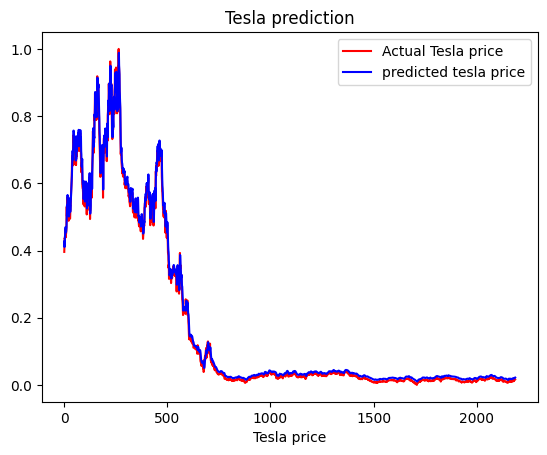

In [185]:
predicted = regressor.predict(x_train)

plt.plot(y_train,color='red',label="Actual Tesla price")
plt.plot(predicted,color="blue",label = "predicted tesla price")
plt.title('Tesla prediction')
plt.xlabel('Tesla price')
plt.legend()

In [176]:
dataset_test=pd.read_csv("stock_daily_tesla_test.csv")
dataset_test = dataset_test.reindex(['Date', 'Open', 'High', 'Low','Close/Last', 'Volume' ],axis=1)

dataset_test['Open'] = dataset_test['Open'].str.replace('$', '')
dataset_test['High'] = dataset_test['High'].str.replace('$', '')
dataset_test['Low'] = dataset_test['Low'].str.replace('$', '')
dataset_test['Close/Last'] = dataset_test['Close/Last'].str.replace('$', '')
dataset_test.head()

,Date,Open,High,Low,Close/Last,Volume
0,03/18/2024,170.02,174.72,165.90,173.80,108214400
1,03/15/2024,163.16,165.1845,160.76,163.57,97146830
2,03/14/2024,167.77,171.17,160.51,162.50,126325700
3,03/13/2024,173.05,176.05,169.15,169.48,106524500
4,03/12/2024,177.77,179.43,172.4101,177.54,87391680


In [177]:
actual_stock_price=dataset_test.iloc[:,1:2].values.astype(np.float32)

In [220]:
#preparing input
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-batch_size:].values

inputs = inputs.reshape(-1,1)
inputs =scaler.transform(inputs)

x_test=[]
y_test=[]
for i in range(batch_size,dataset_test.shape[0]):
    x_test.append(inputs[i-batch_size:i, 0])
    y_test.append(inputs[i, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

y_test = np.array(y_test)

In [221]:
#predicing the value
predicted_stock_price= regressor.predict(x_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [228]:
# Testing Accuracy
score = regressor.evaluate(x_test, y_test)
print(f'Test accuracy: {(1-score)*100:.4f}%')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0020
Test accuracy: 99.9016%


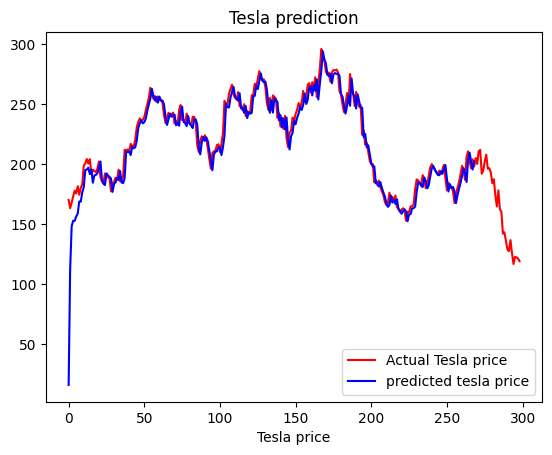

In [231]:
# Plotting actual vs predicted test data
plt.plot(actual_stock_price,color='red',label="Actual Tesla price")
plt.plot(predicted_stock_price,color="blue",label = "predicted tesla price")
plt.title('Tesla prediction')
plt.xlabel('Tesla price')
plt.legend()